# Exercise 6.2 Exporatory Analysis

Comparing python libraries to conduct some expoloratory analysis between variables in the data set.

## 1. Importing Libraries and Data

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Check the matplotlib version

matplotlib.__version__

'3.7.0'

In [36]:
#path 

path = r'/Users/elenasharavara/Documents/02 Data /Prepared data'

In [37]:
#import data

df= pd.read_csv(os.path.join(path, 'movie_dataset.csv'), index_col = 0)

In [38]:
# Check the import

df.head()

,film_id,film_title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,popularity,genres,production_companies,production_countries,spoken_languages
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,160000000,en,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,165000000,en,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,185000000,en,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,237000000,en,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,220000000,en,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"


In [39]:
# Columns list

df.columns

Index(['film_id', 'film_title', 'vote_average', 'vote_count', 'status',
       'release_date', 'revenue', 'runtime', 'adult', 'budget',
       'original_language', 'popularity', 'genres', 'production_companies',
       'production_countries', 'spoken_languages'],
      dtype='object')

## 2. Make subsets of data with columns relevant to the analysis based on questions in prev. exercise

Questions to Explore:

1.	Is there is a connection between films revenue and its popularity?

2.	Are there many profitable films?

3.	Does profit depends on the films vote average?

4.	Does profit depends on the films runtime?

5.  What is the optimal runtime for the film?



In [18]:
# make a list of the column names grouped to make df easier

vote = ['vote_average', 'vote_count', 'popularity','release_date']

production = ['production_countries', 'production_companies', 'original_language','spoken_languages' ]

costs = [ 'revenue', 'budget']

film_genre = ['film_title', 'genres', 'adult','film_id', 'status' ]

In [19]:
# make smaller subsets to make analysis more viewable

# the first one will just have all relevant variables

df_all = df[['film_id', 'vote_average', 'vote_count',
       'release_date', 'revenue', 'runtime', 'popularity', 'budget']]
             


## 3A. Create a correlation matrix heatmap (colored) in matplotlib

Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

In [9]:
# correlation matrix of all variables

df_all.corr()

/var/folders/cw/29djb3hx467b1b4_7sv0rdyh0000gn/T/ipykernel_9494/2132603712.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_all.corr()


,film_id,vote_average,vote_count,revenue,runtime,popularity,budget
film_id,1.000000,-0.413813,-0.088917,-0.059292,-0.194875,-0.075399,-0.079624
vote_average,-0.413813,1.000000,0.095234,0.061774,0.221432,0.111131,0.074694
vote_count,-0.088917,0.095234,1.000000,0.764291,0.061020,0.253179,0.626808
revenue,-0.059292,0.061774,0.764291,1.000000,0.044851,0.248410,0.706071
runtime,-0.194875,0.221432,0.061020,0.044851,1.000000,0.068852,0.057657
popularity,-0.075399,0.111131,0.253179,0.248410,0.068852,1.000000,0.263537
budget,-0.079624,0.074694,0.626808,0.706071,0.057657,0.263537,1.000000


In [10]:
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)


film_title
release_date
genres
production_companies
production_countries
spoken_languages


/var/folders/cw/29djb3hx467b1b4_7sv0rdyh0000gn/T/ipykernel_15276/1597867496.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df_all.corr(), fignum=f.number) # type of plot


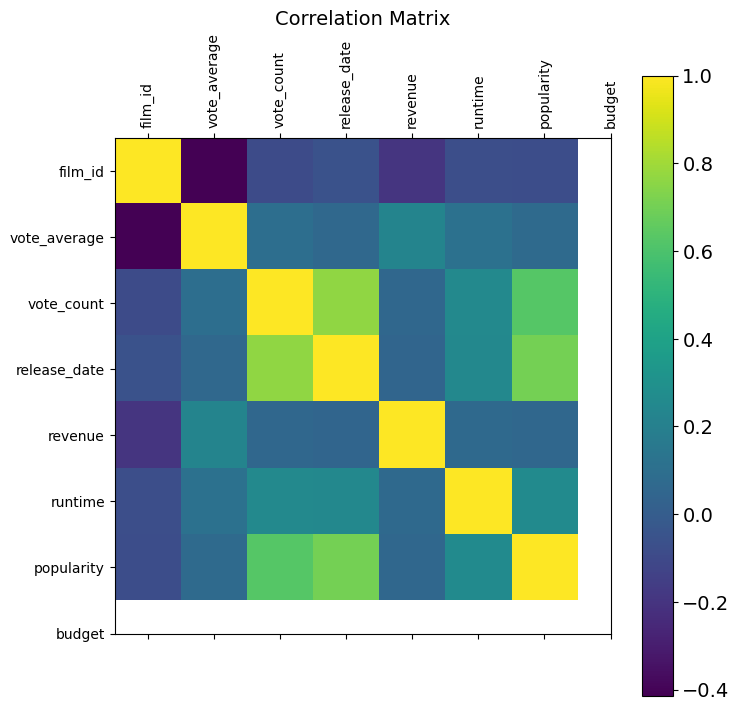

In [45]:
# add labels and a legend for the large correlation map

f = plt.figure(figsize=(8,8)) # figure size 
plt.matshow(df_all.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_all.shape[1]), df_all.columns, fontsize=10, rotation=90) # x axis labels
plt.yticks(range(df_all.shape[1]), df_all.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title
plt.savefig("corr_all.png")  #save


## 3B. Create a correlation matrix heatmap (colored) in seaborn



/var/folders/cw/29djb3hx467b1b4_7sv0rdyh0000gn/T/ipykernel_15276/1060910273.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap(df_all.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to


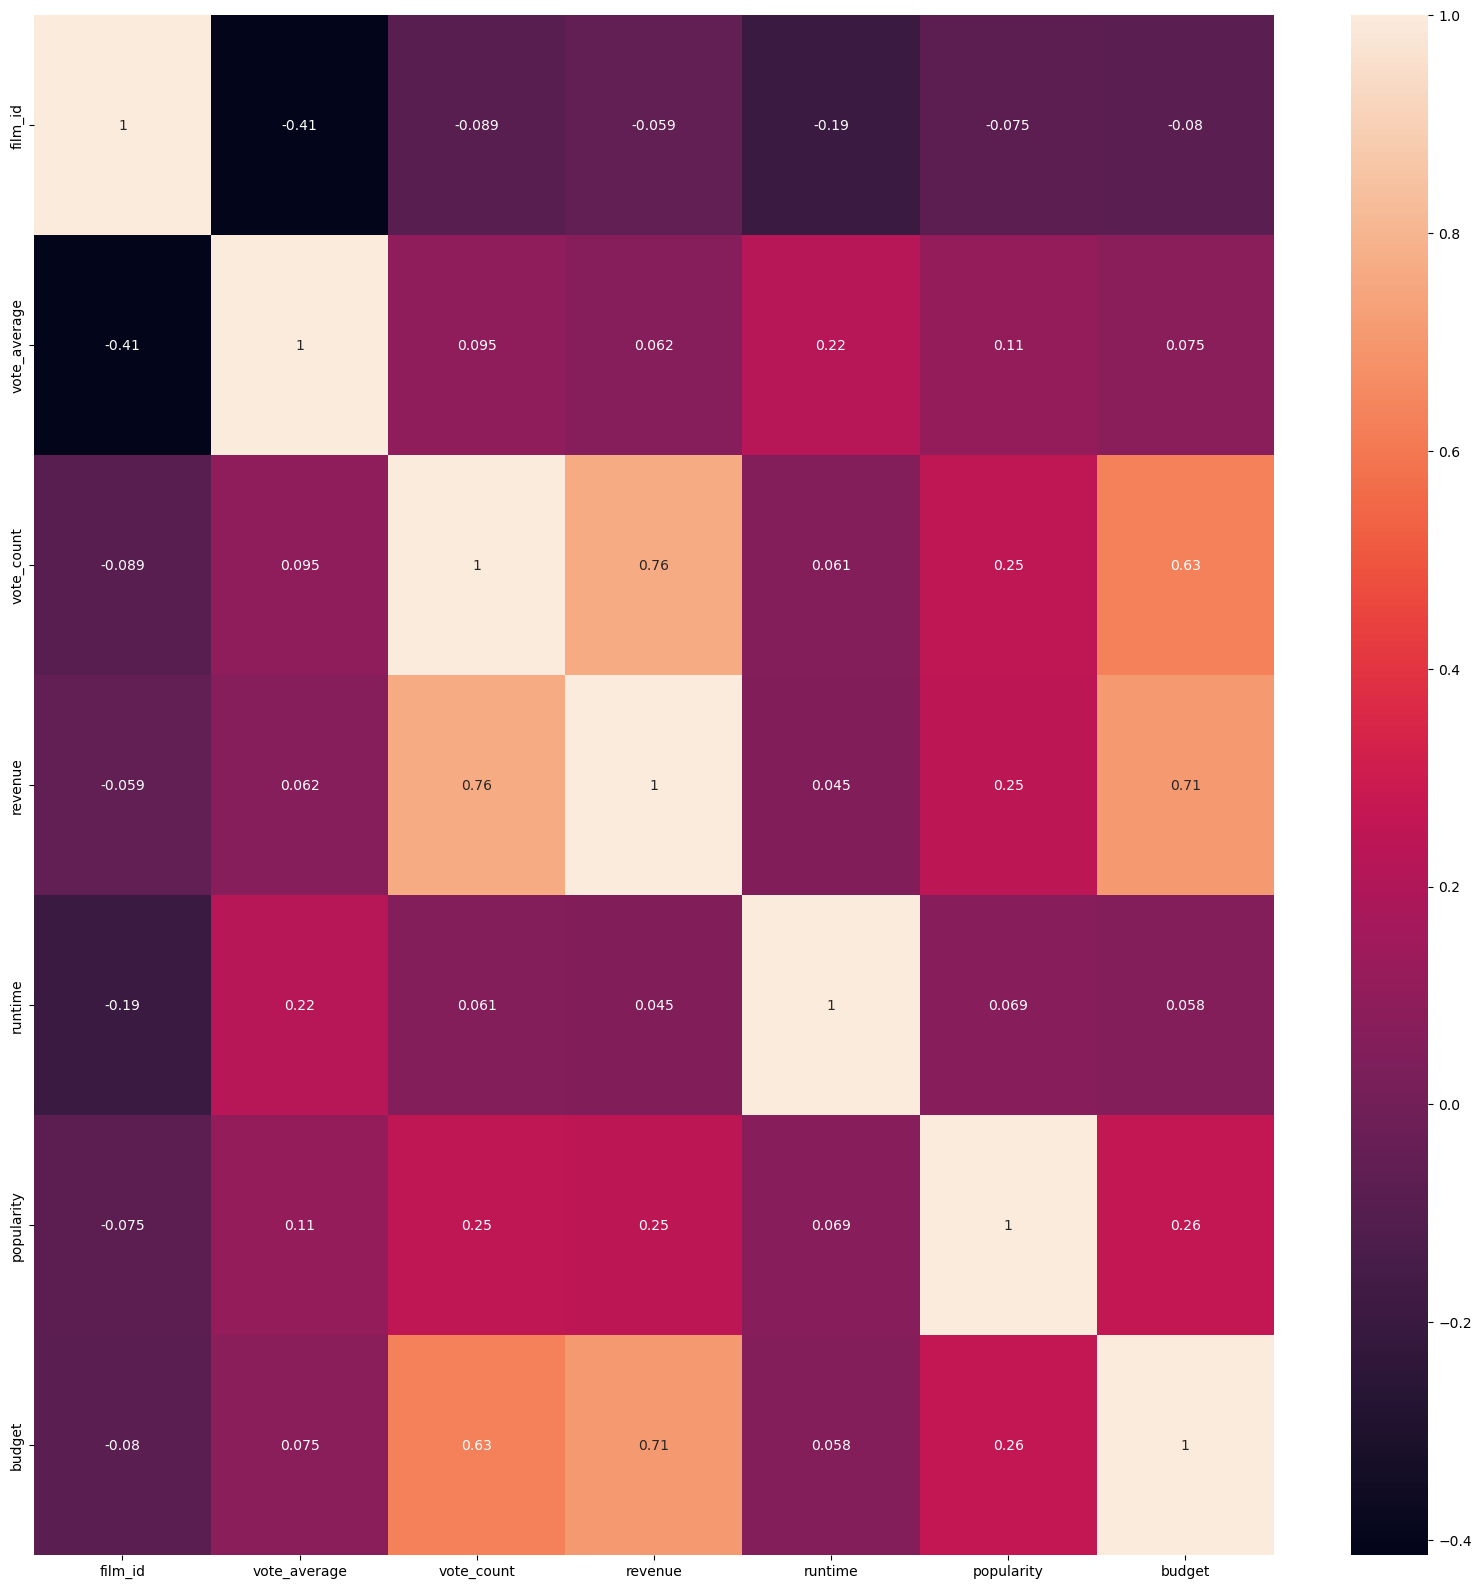

In [46]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(7,7))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_all.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

# Step 3. Notes:

There are definitely some variables that have strong correlation and may be worth looking into more, for example revenue and vote_count, revanue and budger. More people vote, it means wathcing films, and the bigger budget is, the revenue is growing. 

## Step 3: Correlation continued, I will make a correlation plot for each of my subset dfs

/var/folders/cw/29djb3hx467b1b4_7sv0rdyh0000gn/T/ipykernel_15276/2584863220.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap(df_film_genre.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to


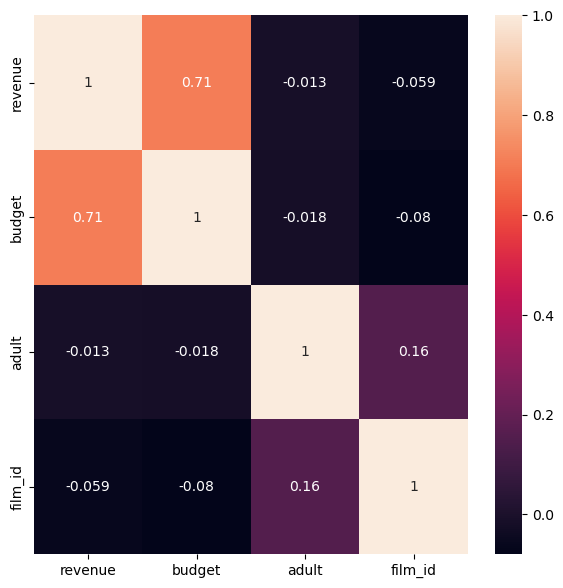

In [47]:
#  film_genre

# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(7,7))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_film_genre.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

/var/folders/cw/29djb3hx467b1b4_7sv0rdyh0000gn/T/ipykernel_15276/2430313976.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap(df_costs.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to


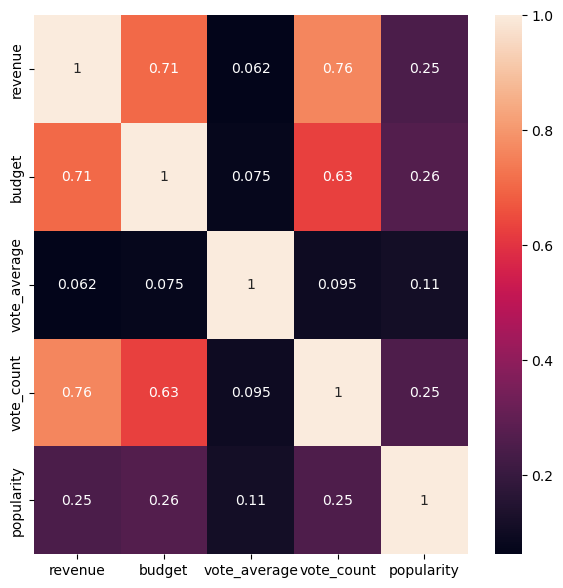

In [48]:
# costs

# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(7,7))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_costs.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### There appear to be stronger postitive correlations between budget and revenue, budget and vote count.

# 4. Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.
Discuss the output in a markdown cell.

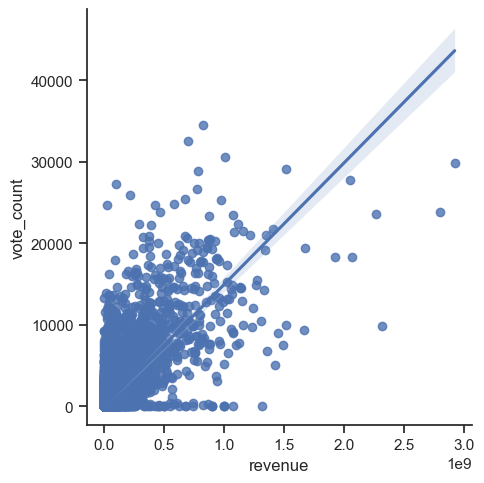

In [34]:
# I will make a scatter plot of revenue and vote_count

sns.lmplot(x = 'revenue', y = 'vote_count', data = df)

### There does seem to be some correlation but there are some outliers. 

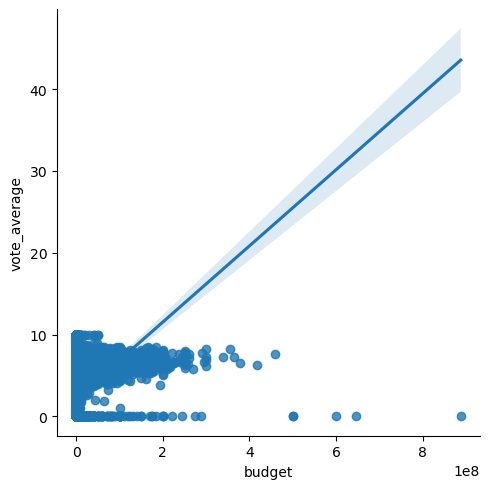

In [62]:
# I will also make a scatter plot of budget and vote revenue

sns.lmplot(x = 'budget', y = 'vote_average', data = df)

### The is no strong correlation between budget and vote_average.

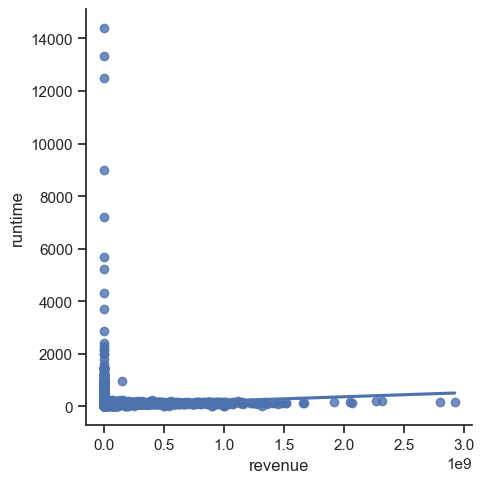

In [54]:
# I will also make a scatter plot of revenue and runtime
sns.lmplot(x = 'revenue', y = 'runtime', data = df)

### The is no  correlation between revenue and runtime.

### Investigate Outliers in Variables

In [12]:
df_all.describe()

,film_id,vote_average,vote_count,revenue,runtime,popularity,budget
count,9.347450e+05,934745.000000,934745.000000,9.347450e+05,934745.000000,934745.000000,9.347450e+05
mean,6.223389e+05,2.232957,22.939624,7.782203e+05,51.889123,1.424210,3.061706e+05
std,3.331466e+05,3.152949,351.094674,1.798041e+07,62.425681,8.349914,5.058921e+06
min,2.000000e+00,0.000000,0.000000,-1.200000e+01,0.000000,0.000000,0.000000e+00
25%,3.509120e+05,0.000000,0.000000,0.000000e+00,2.000000,0.600000,0.000000e+00
50%,6.251880e+05,0.000000,0.000000,0.000000e+00,39.000000,0.600000,0.000000e+00
75%,9.122350e+05,5.294000,1.000000,0.000000e+00,90.000000,0.958000,0.000000e+00
max,1.185198e+06,10.000000,34495.000000,2.923706e+09,14400.000000,2994.357000,8.880000e+08


<Axes: >

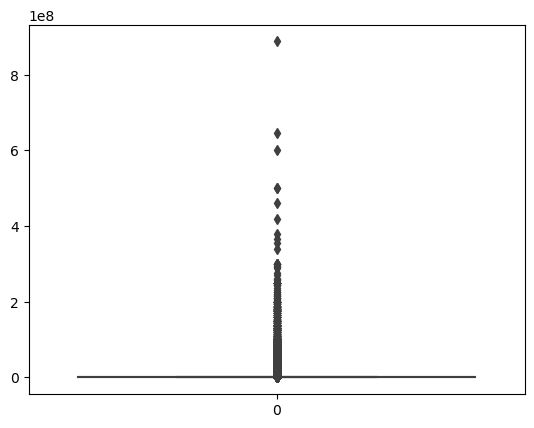

In [29]:
sns.boxplot(df['budget'])

<Axes: >

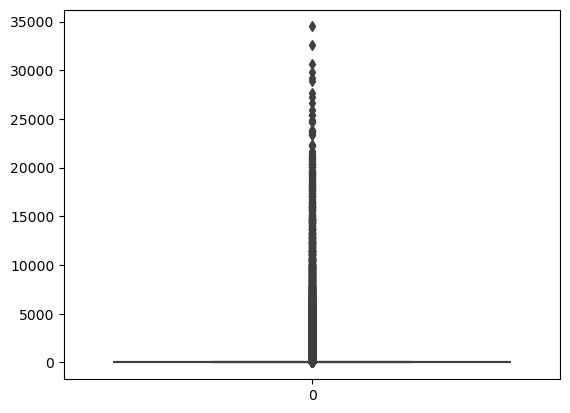

In [31]:
sns.boxplot(df['vote_count'])

# 5. Create a pair plot 


In [12]:
# Create a subset 

df_sub = df[['film_id', 'vote_average', 'revenue', 'popularity', 'budget']]

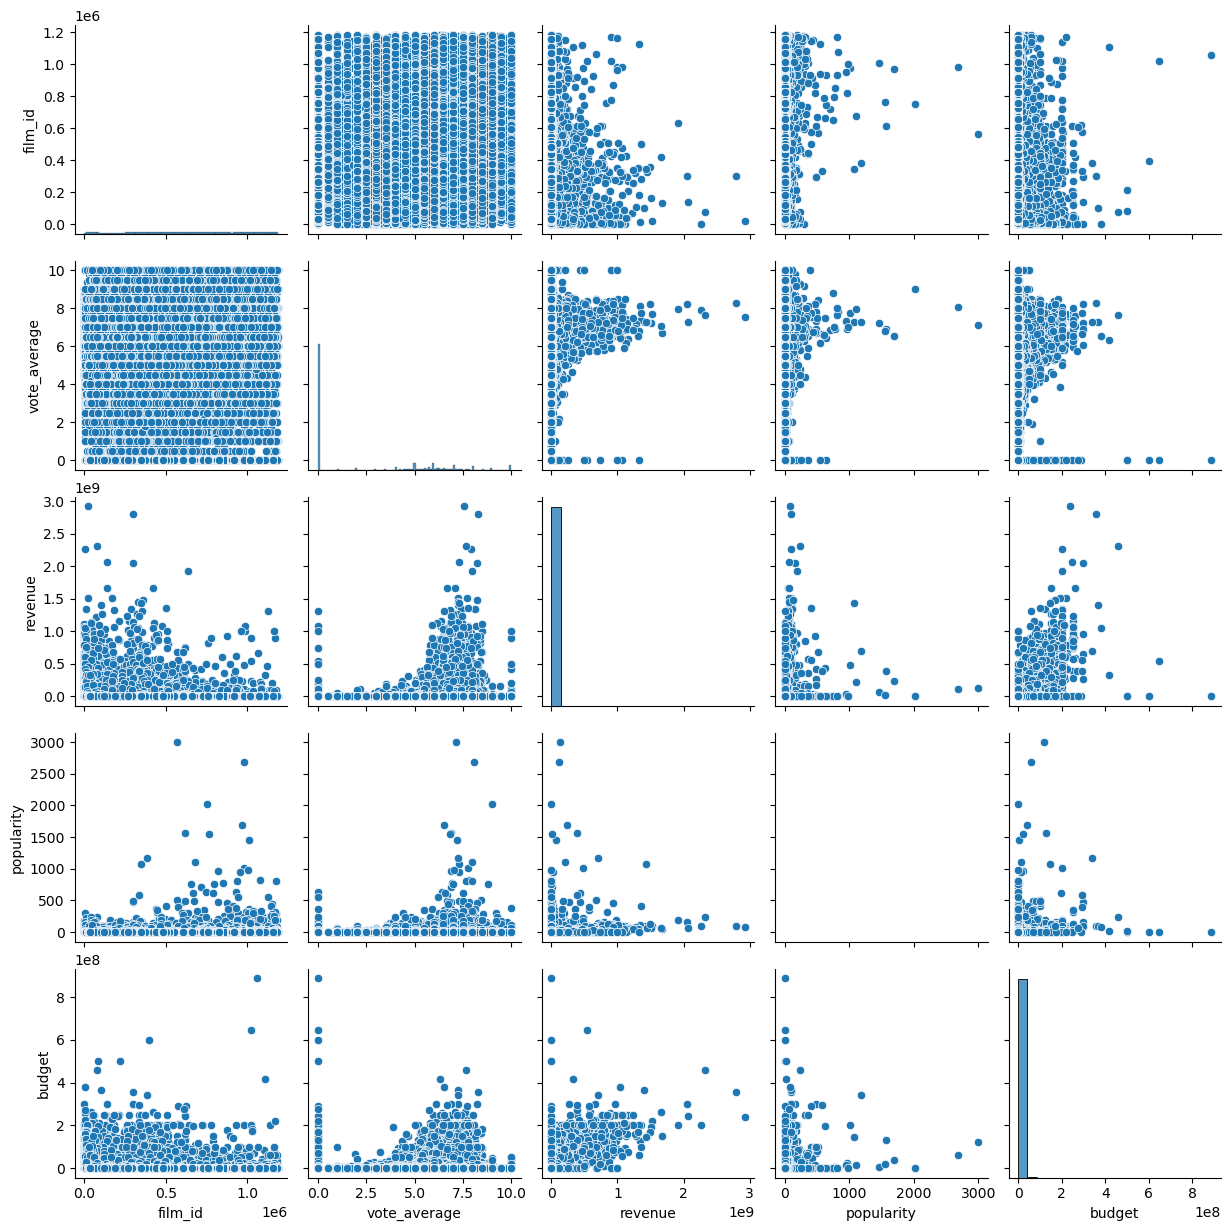

In [13]:
sns.pairplot(df_sub)

### There seems to be a link between films budget and its revenue

# 6. Create a categorical plot and interpret the results.

In [11]:
# Create a subset
df_sub2 = df[[ 'revenue', 'popularity', 'budget']]

<Axes: ylabel='Count'>

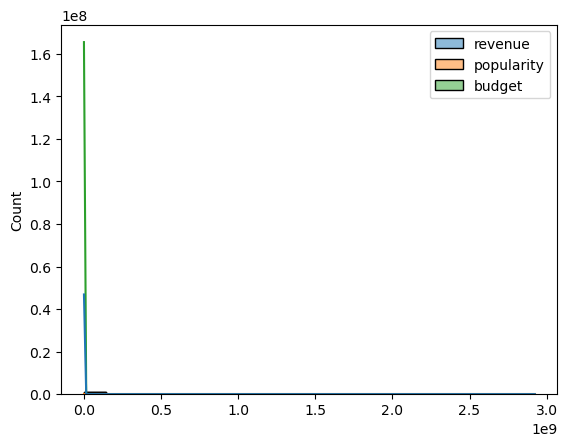

In [42]:
sns.histplot(df_sub2, bins = 20, kde = True)

<Axes: xlabel='budget', ylabel='Count'>

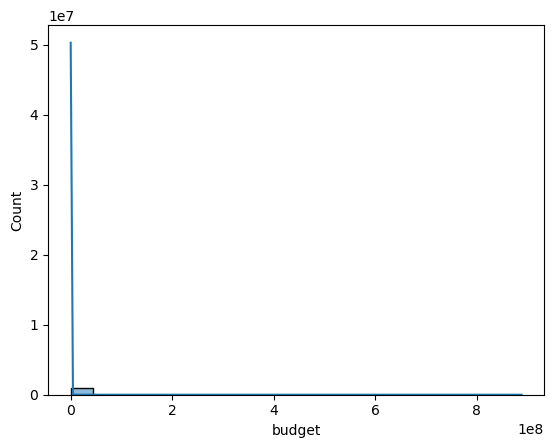

In [43]:
#Checking distribution of Budget
sns.histplot(df['budget'],bins = 20, kde = True)

<Axes: xlabel='revenue', ylabel='Count'>

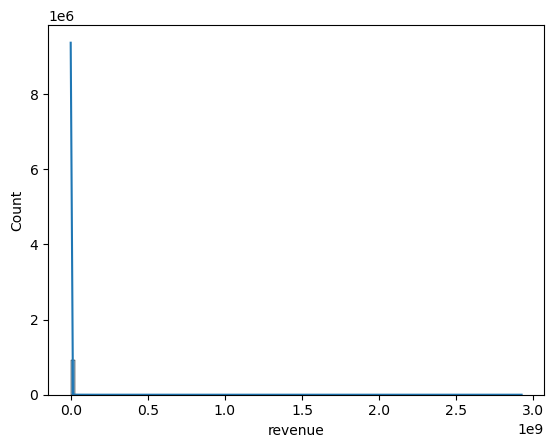

In [45]:
#Checking distribution of revenue
sns.histplot(df['revenue'],bins = 100, kde = True)

### Create categories to group revenue level

less than 20 - low revenue     
20- 49 - mid revenue     
50 and above - high revnue     


In [46]:
df.loc[df['revenue'] < 20, 'revenue group'] = 'Low revenue'

In [47]:
df.loc[(df['revenue'] >= 20) & (df['revenue'] < 50), 'revenue group'] = 'Middle revenue'

In [48]:
df.loc[df['revenue'] >= 50, 'revenue group'] = 'High revenue'

In [49]:
# check the column

df['revenue group'].value_counts(dropna = False)

Low revenue       916773
High revenue       17797
Middle revenue       175
Name: revenue group, dtype: int64

In [50]:
df['revenue'].value_counts(dropna = False)

0           916008
100            317
1              253
100000         136
10             132
             ...  
13037403         1
12506188         1
408680           1
116799           1
466143           1
Name: revenue, Length: 14047, dtype: int64

### Although the majority of the revenue is a low revenue than follows high revenue and low.

# 7. Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.


1.	Is there is a connection between films revenue and its popularity?

The relations between films revenue and its popularity is very weak.

2.	Are there many profitable films?

Most of the movies are not profitable, but there is a huge number of films that have a high profit.

3.	Does profit depends on the films vote average?

There is a medium correlation between films profit and and its vote average.

4.	Does profit depends on the films runtime?

The relations between films revenue and its runtime is very weak.

5. What is the optimal runtime for the film?

The optimal films runtime is more than 50 minutes.


Questions 

Why most of the movies are not profitable?

What genres are the most profitable?

What is the potential customers profile?

# 8. Define any hypotheses that you can at this point. You’ll be testing these later on.

Hypothesis 1:

Most of the movies are not profitable.

Hypothesis 2:

The higher films vote average, the bigger profit is.

Hypothesis 3:

Movies profit does not depend on its popularity.

